
# Args (arguments) and Kwargs (keyword arguments)

- `**kwargs` are just like `*args` except you declare the variables and the amount (keyword argument/dictionary) within the function arguments
- use `*` (for `*args`)/ `**` (for `**kwargs`) unpack arguments that are already in a list or a tuple when function calling


In [9]:
from scipy.spatial import HalfspaceIntersection, ConvexHull

"""
HalfspaceIntersection(halfspaces, interior_point)

where,
    halfspaces = Stacked Inequalities of the form Ax + b <= 0 in format [A; b]
    interior_point = Point clearly inside the region defined by halfspaces
The gca() method figure module of matplotlib library is used to get the current axes.
"""
 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

def render_inequalities(halfspaces, feasible_point, xlim, ylim):
    hs = HalfspaceIntersection(np.array(halfspaces), np.array(feasible_point))
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(*xlim, 100)

    for h in halfspaces:
        if h[1]== 0:
            ax.axvline(-h[2]/h[0], color="#2c3e50")
        else:
            ax.plot(x, (-h[2]-h[0]*x)/h[1], color="#2c3e50")
    x, y = zip(*hs.intersections)
    points = list(zip(x, y))
    convex_hull = ConvexHull(points)
    polygon = Polygon([points[v] for v in convex_hull.vertices], color="#34495e")
    ax.add_patch(polygon)
    ax.plot(x, y, 'o', color="#e67e22")

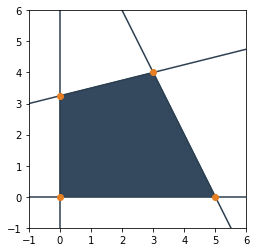

In [10]:
halfspaces = [
    [-1, 0., 0.],    # x₁ ≥ 0
    [0., -1., 0.],   # x₂ ≥ 0
    [-1., 4., -13.], # 4x₂ - x₁ ≤ 13
    [2., 1., -10.]   # x₂ + 2x₁ ≤ 10
]
feasible_point = [0.5, 0.5]
xlim = (-1, 6)
render_inequalities(halfspaces, feasible_point, xlim, xlim)
plt.show()

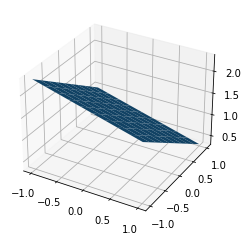

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a,b,c,d = 1,2,3,4

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z)

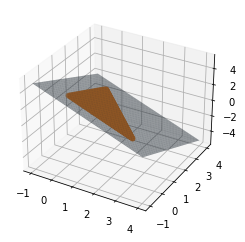

In [17]:
"""
If we have n=3 variables and m=1 equation, for example x₁ + x₂ + x₃ = 3 we will have this picture:
A basic feasible solution of the linear program
    maximize cᵀx subject to Ax=b, x≥0
is a feasible solution x∈ Rⁿ for which there exists an m-element set S ⊆ {1, 2, . . . , n} such that
1. The (square) matrix Aₛ is nonsingular, i.e., the columns indexed by B are linearly independent.
2. xⱼ=0 for all J ∉ S.
"""

from mpl_toolkits.mplot3d import Axes3D

plt3d = plt.figure().gca(projection='3d', aspect='auto')

# plane: a*x1 + b*x2 + c*x3 + d = 0
normal = [1, 1, 1]
point = [1, 1, 1]
d = -3

# meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

xx, yy = np.meshgrid(np.linspace(-1, 4, 100), np.linspace(-1, 4, 100))
zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
plt3d.plot_surface(
    xx,
    yy,
    zz,
    alpha=0.5,
    color="#34495e"
)

ax = plt.gca()
for row_i, row in enumerate(xx):
    x_row = []
    y_row = []
    z_row = []
    for column_i, x in enumerate(row):
        y = yy[row_i][column_i]
        z = zz[row_i][column_i]
        if x < 0 or y < 0 or z < 0:
            continue

        x_row.append(x)
        y_row.append(y)
        z_row.append(z)
    if len(x_row) > 0:
        ax.scatter(
            x_row,
            y_row,
            z_row,
            color="#e67e22"
        )

plt.show()